### train 1k와 test 1k <- SVM으로 할꺼임!

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
train = pd.read_csv("../Data/train_1k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
# train.head()
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> 0번 컬럼이 정답 컬럼.   
> 28 * 28 칸을 한줄로 나타낸것

In [3]:
# 0번 빼고는 나머지 다 이미지라 의미가 없다.
train[0].describe()

count    1001.000000
mean        4.447552
std         2.883313
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: 0, dtype: float64

In [4]:
# train[0]의 숫자 빈도
# train[0]이 Traget컬럼
train[0].value_counts()

7    117
1    116
4    105
9    100
2     99
0     98
6     94
3     93
5     92
8     87
Name: 0, dtype: int64

In [5]:
# 1) train data, label 나누기
train_data = train.loc[:,train.columns != 0]
train_label = train.loc[:, train.columns == 0] 
train_label

,0
0,5
1,0
2,4
3,1
4,9
...,...
996,6
997,0
998,3
999,6


In [6]:
# # 또는 2) train data, label 나누기
# train_data = train.iloc[:,1:]
# train_label = train[0] 
# train_label

In [7]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### train data의 내용 보기
- R 하고는 다르게 간단하게 정리할수 있음

In [8]:
import numpy as np
temp = np.array(train.loc[0, train.columns != 0])
print(temp.reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

> 0번은 하얀색(공백), 숫자가 큰숫자는 꽉 누른 숫자  
> 화면이 작아서 다 안나옴

In [9]:
# train data의 재용 줄여보기
tempColumns = []
temp1 = temp.reshape(28,28)
count = 0

for i in range(0, 29):
    if i % 2 == 1:
        for j in range(0,29):
            if j % 2 == 1:
                tempColumns.append(temp1[i,j])
                count += 1
count

196

In [10]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [11]:
#  test data, label 나누기
test_data = test.loc[:,test.columns != 0]
test_label = test.loc[:, test.columns == 0] 
test_label.head()

,0
0,7
1,2
2,1
3,0
4,4


In [12]:
# 학습하기 (SVM)
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [13]:
clf.score(test_data, test_label)

0.8751248751248751

In [14]:
from sklearn import svm,metrics

In [15]:
pred = clf.predict(test_data)

In [16]:
clf_report = metrics.classification_report(test_label,pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        85
           1       0.98      0.98      0.98       126
           2       0.91      0.88      0.89       116
           3       0.94      0.75      0.83       107
           4       0.85      0.86      0.86       110
           5       0.73      0.86      0.79        87
           6       0.92      0.87      0.89        87
           7       0.84      0.90      0.87        99
           8       0.86      0.78      0.82        89
           9       0.82      0.89      0.85        95

    accuracy                           0.88      1001
   macro avg       0.87      0.87      0.87      1001
weighted avg       0.88      0.88      0.88      1001



---
### train 1k와 test 1k, <- SVM, Log

In [17]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# 시각화를 통한 Log의 필요성 확인
import matplotlib.pyplot as plt

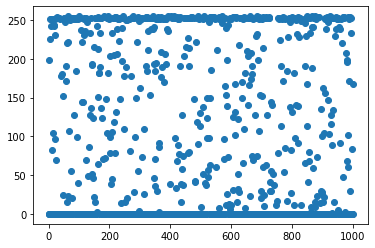

In [20]:
plt.scatter(train_data.index, train_data[300])
plt.show()

> 이렇게 (산만한)퍼져있는그래프를 단순화 시키는게 Log임

### 로그 변환이유
차원축소  
로그는 태생적으로 큰값을 작게 표기하기 위해 고안된 방법이며, 측정단위를 키우는 것만으로도 해결하지 못한 부분을 해결해 준다.  
로그의 시작은 천문학에서 시작  


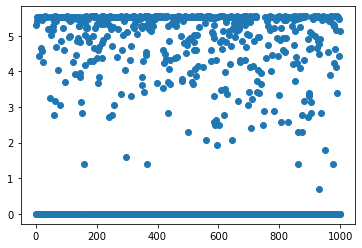

In [21]:
plt.scatter(train_data.index, np.log1p(train_data[300]))
plt.show()

### np.log1p이란?
기본적으로 log안의 x값은 양수만 가능하다.  
하지만 0에 가까운 아주 작은 양수(예:0.00000001)
음의 무한대가 가까워지게 된다.(파이썬에서는 -int라는 단어를씀)
이를 방지하기위해 1을 더함으로써 0보다 큰 양수의 값을 갖게된다.
- 음의 무한대 또는 양의 무한대를 방지하기위해 사용한다.(log1p(+1), log2p(+2), log3p(+3))

In [22]:
# Data 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
test_data = pd.DataFrame(np.log1p(test_data))
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [25]:
clf.score(test_data, test_label)

0.8901098901098901

> 정확도가 올라갔다!  
> train_data와 test_data가 거의 1:1인걸 감안해서 90%가 나온거면 엄청 잘나오는거임  

---
## 10k의 SVM 적용하기

In [26]:
train10k = pd.read_csv("../Data/train_10k.csv")
test1k = pd.read_csv("../Data/test_1k.csv")

In [27]:
train10k.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
len(train10k)

9999

In [29]:
train_data = train10k.iloc[:,1:]
train_label = train10k.iloc[:,0]

In [30]:
test_data = test1k.iloc[:,1:]
test_label = test1k.iloc[:,0]

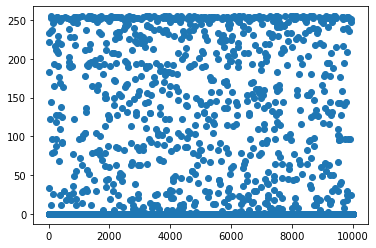

In [31]:
plt.scatter(train_data.index, train_data.iloc[:,100])
plt.show()

In [32]:
# Data 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Data 표준화
test_data = pd.DataFrame(np.log1p(test_data))
test_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


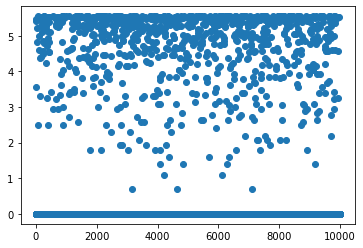

In [34]:
plt.scatter(train_data.index, train_data.iloc[:,100])
plt.show()

In [35]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [36]:
clf.score(test_data, test_label)

0.958

# 20k 의 SVM 적용하기

In [37]:
train20k = pd.read_csv("../Data/train_20k.csv")
test1k = pd.read_csv("../Data/test_1k.csv")

In [38]:
len(train20k)

20000

In [39]:
train_data = train20k.iloc[:,1:]
train_label = train20k.iloc[:,0]

In [40]:
test_data = test1k.iloc[:,1:]
test_label = test1k.iloc[:,0]

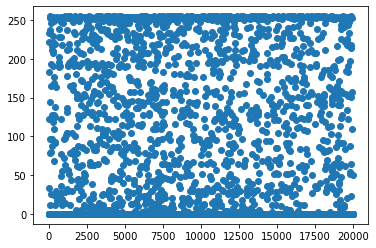

In [41]:
plt.scatter(train_data.index, train_data.iloc[:,100])
plt.show()

In [42]:
# Data 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Data 표준화
test_data = pd.DataFrame(np.log1p(test_data))
test_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


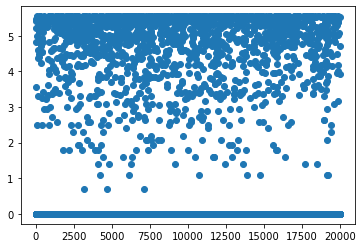

In [44]:
plt.scatter(train_data.index, train_data.iloc[:,100])
plt.show()

In [45]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [46]:
clf.score(test_data, test_label)

0.965

> data 의 양이 많아질수록 정확도가 올라간다